# Nearest neighbors

This notebook illustrates the classification of the nodes of a graph by the [k-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), using the labels known for some nodes.

In [2]:
from IPython.display import SVG

In [3]:
import numpy as np

In [4]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.classification import KNN, get_accuracy_score
from sknetwork.embedding import Spectral
from sknetwork.visualization import svg_graph, svg_bigraph

In [5]:
from sknetwork.linalg import normalize

## Graphs

In [17]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

In [18]:
labels = {i: labels_true[i] for i in [0, 33]}

In [19]:
# KNN with cosine similarity
knn = KNN(n_neighbors=1)
labels_pred = knn.fit_predict(adjacency, labels)

In [20]:
accuracy = get_accuracy_score(labels_true, labels_pred)
np.round(accuracy, 2)

0.82

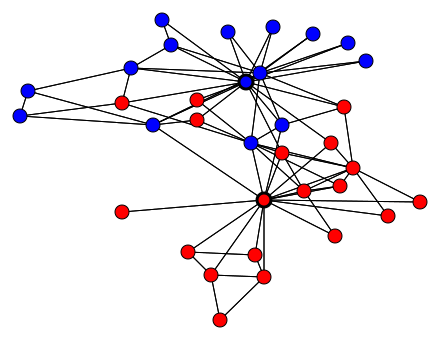

In [21]:
image = svg_graph(adjacency, position, labels=labels_pred, seeds=labels)
SVG(image)

In [22]:
# KNN in embedding space
knn = KNN(embedding_method=Spectral(2), n_neighbors=1)
labels_pred = knn.fit_predict(adjacency, labels)

In [23]:
accuracy = get_accuracy_score(labels_true, labels_pred)
np.round(accuracy, 2)

0.97

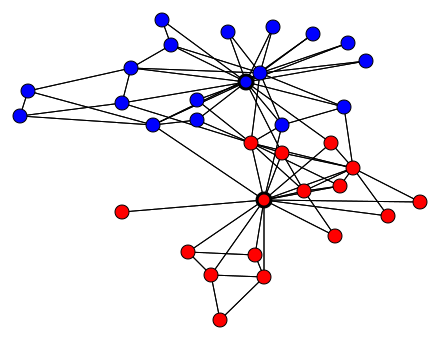

In [24]:
image = svg_graph(adjacency, position, labels=labels_pred, seeds=labels)
SVG(image)

In [37]:
# soft classification (here probability of label 1)
labels = {i: labels_true[i] for i in [0, 1, 30, 33]}
knn = KNN(Spectral(2), n_neighbors=3)
knn.fit(adjacency, labels)
membership = knn.membership_

In [38]:
scores = membership[:,1].toarray().ravel()

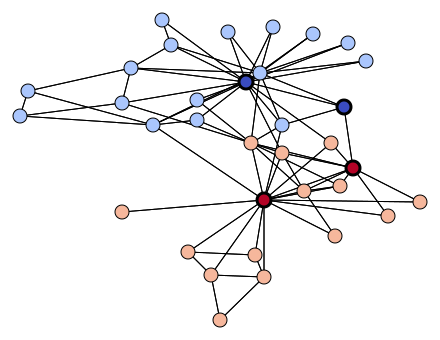

In [40]:
image = svg_graph(adjacency, position, scores=scores, seeds=labels)
SVG(image)

## Directed graphs

In [41]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [53]:
rembrandt = 5
klimt = 6
cezanne = 11
labels = {cezanne: 0, rembrandt: 1, klimt: 2}

In [58]:
knn = KNN(Spectral(3), n_neighbors=2)
labels_pred = knn.fit_predict(adjacency, labels)

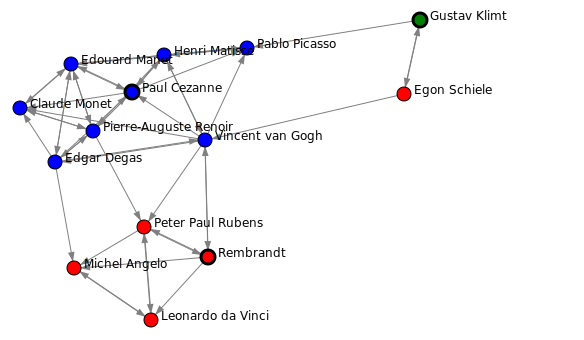

In [59]:
image = svg_graph(adjacency, position, names, labels=labels_pred, seeds=labels)
SVG(image)

In [62]:
# soft classification (here for scores for the label of Cezanne)
membership = knn.membership_
scores = membership[:,0].toarray().ravel()

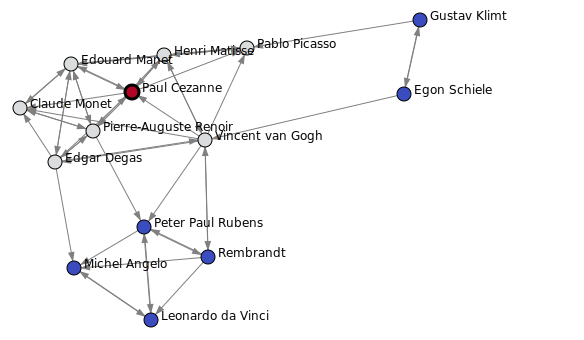

In [63]:
image = svg_graph(adjacency, position, names, scores=scores, seeds=[cezanne])
SVG(image)

## Bipartite graphs

In [64]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

In [65]:
inception = 0
drive = 3
budapest = 8

In [66]:
labels_row = {inception: 0, drive: 1, budapest: 2}

In [67]:
knn = KNN(Spectral(3), n_neighbors=2)
knn.fit(biadjacency, labels_row)
labels_row_pred = knn.labels_row_
labels_col_pred = knn.labels_col_

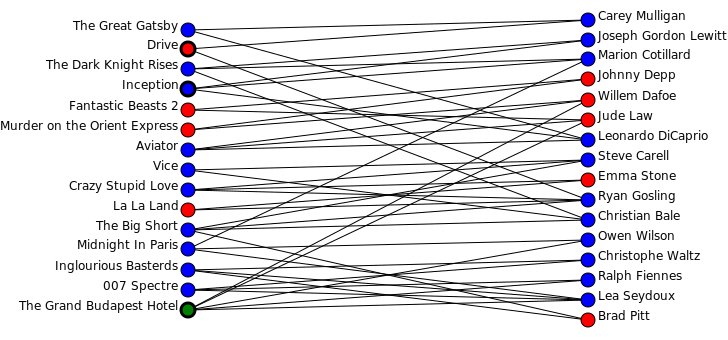

In [68]:
image = svg_bigraph(biadjacency, names_row, names_col, labels_row_pred, labels_col_pred, seeds_row=labels_row)
SVG(image)

In [69]:
# soft classification
membership_row = knn.membership_row_
membership_col = knn.membership_col_

In [70]:
scores_row = membership_row[:,1].toarray().ravel()
scores_col = membership_col[:,1].toarray().ravel()

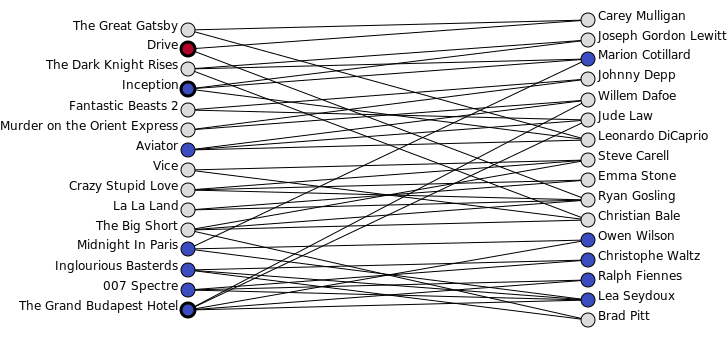

In [71]:
image = svg_bigraph(biadjacency, names_row, names_col, scores_row=scores_row, scores_col=scores_col,
                    seeds_row=labels_row)
SVG(image)
